In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from subprocess import Popen, PIPE, call

In [2]:
#loci_nt
path_all_all = '/home/juan/Desktop/juan/bio/mrcv/data/ss_miteall/all_all/'
path_all_21 = '/home/juan/Desktop/juan/bio/mrcv/data/ss_miteall/all_21/'
path_mite_all = '/home/juan/Desktop/juan/bio/mrcv/data/ss_miteall/mite_all/'
path_mite_21 = '/home/juan/Desktop/juan/bio/mrcv/data/ss_miteall/mite_21/'

#mirbase
path_mite_21_seqs = '/home/juan/Desktop/juan/bio/mrcv/data/ss_miteall/mite_21/mir.Y.fasta'
path_mirbase = '/home/juan/Desktop/juan/bio/mrcv/data/ss_mite/mite_21/mir.Y.mirbase.csv'

#annotations
file_ann = '/home/juan/Desktop/juan/bio/mrcv/data/genome/annotations/introns.gff3'
file_ann_promoters = '/home/juan/Desktop/juan/bio/mrcv/data/genome/annotations/promoters.gff3'

#MITEs
path_mites = '/home/juan/Desktop/juan/bio/mrcv/data/genome/annotations/all_filter_mite_tracker_rep.gff3'
path_locifile = '/home/juan/Desktop/juan/bio/mrcv/data/genome/locifiles/mitesall.locifile.csv'


In [5]:
df_mites = pd.read_csv(path_mites, sep='\t')
df_mites.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']
print('MITEs: ' + str(len(df_mites.index)))


MITEs: 1211339


all_all clusters: 48876


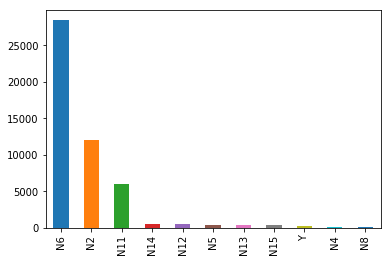

In [3]:
df_all_all = pd.read_csv(path_all_all + 'Results.txt', sep='\t')
print('all_all clusters: ' + str(len(df_all_all.index)))
df_all_all.MIRNA.value_counts().plot('bar')


In [4]:
df_all_all = df_all_all[df_all_all.MIRNA == 'Y']
print('all_all miRNA: ' + str(len(df_all_all.index)))


all_all miRNA: 162


all_21 clusters 33636


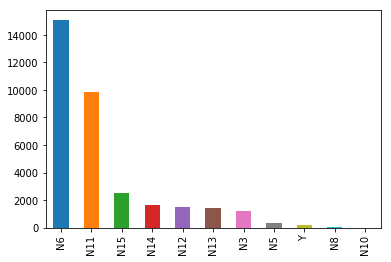

In [6]:
df_all_21 = pd.read_csv(path_all_21 + 'Results.txt', sep='\t')
df_all_21.MIRNA.value_counts().plot('bar')
print('all_21 clusters ' + str(len(df_all_21.index)))

In [7]:
df_all_21 = df_all_21[df_all_21.MIRNA == 'Y']
print('all_21 miRNA: ' + str(len(df_all_21.index)))

all_21 miRNA: 221


In [8]:
df_anns = {}
for chromosome in df_mites.seqname.unique():
    df_anns[chromosome] = df_mites[df_mites.seqname == chromosome]

In [ ]:
yeses = 0
total = 0
for k, v in df_all_21.iterrows():
    print(k,v['#Locus'])
    total += 1
    seqname = v['#Locus'].split(':')[0]
    if seqname == 'Un':
        continue
    start = v['#Locus'].split(':')[1].split('-')[0]
    end = v['#Locus'].split(':')[1].split('-')[1]
    ss = False
    for k2, v2 in df_anns[seqname].iterrows():
        seqname2 = v2.seqname
        start2 = min(v2.start,v2.end)
        end2 = max(v2.start,v2.end)
        if int(start) <= int(end2) and int(end) >= int(start2):
            ss = True
            print( v['#Locus'], v2.seqname, v2.start, v2.end, v2.attribute)
            print('*'*10)
            break
    if ss:
        yeses += 1
yeses * 100 / total

339 1A:5451023-5451104


8.641975308641975

In [5]:
d_a = df[df.MIRNA == 'Y']

In [6]:
len(d_a.index)

212

In [7]:
path_mites_locifile = '/home/juan/Desktop/juan/bio/mrcv/data/ss/GTP_MITEs_21/Results.txt'
df_m_loci = pd.read_csv(path_mites_locifile, sep='\t')


In [8]:
d_m = df_m_loci[df_m_loci.MIRNA == 'Y']

In [9]:
len(d_m.index)

93

In [26]:
yeses = 0
stuff = []
total = 0
for k, v in d_a.iterrows():
    total += 1
    seqname = v['#Locus'].split(':')[0]
    start = v['#Locus'].split(':')[1].split('-')[0]
    end = v['#Locus'].split(':')[1].split('-')[1]
    ss = False
    for k2, v2 in d_m.iterrows():
        seqname2 = v2['#Locus'].split(':')[0]
        if seqname2 != seqname:
            continue
        start2 = v2['#Locus'].split(':')[1].split('-')[0]
        end2 = v2['#Locus'].split(':')[1].split('-')[1]
        if int(start) <= int(end2) and int(end) >= int(start2):
            stuff_ = {}
            stuff_['miRNA_cluster_locus'] = v['#Locus']
            stuff_['miRNA_cluster_name'] = v['Name']
            stuff_['MITE_miRNA_cluster_locus'] = v2['#Locus']
            stuff_['MITE_miRNA_cluster_name'] = v2['Name']
            stuff.append(stuff_)
            ss = True
            print(v)
            print(v2)
            print('*'*10)
            break
    if ss:
        yeses += 1
yeses * 100 / total

#Locus           1A:169645895-169646000
Name                        Cluster_742
Length                              106
Reads                                 9
RPM                               0.719
UniqueReads                           1
FracTop                               1
Strand                                +
MajorRNA          UAGAGAUUUCAAAUGGAACAC
MajorRNAReads                         7
Complexity                        0.333
DicerCall                            21
MIRNA                                 Y
PhaseScore                           -1
Short                                 0
Long                                  0
20                                    0
21                                    9
22                                    0
23                                    0
24                                    0
Name: 741, dtype: object
#Locus                                      1A:169645857-169646029
Name             MITE_T_62663|chr6B|624472362|624472543|TTTAAA|...
L

17.452830188679247

In [25]:
stuff

[{'miRNA_cluster_locus': '1A:169645895-169646000',
  'miRNA_cluster_name': 'Cluster_742',
  'MITE_miRNA_cluster_locus': '1A:169645857-169646029',
  'MITE_miRNA_cluster_name': 'MITE_T_62663|chr6B|624472362|624472543|TTTAAA|197|F2512'},
 {'miRNA_cluster_locus': '1B:673858855-673858929',
  'miRNA_cluster_name': 'Cluster_2779',
  'MITE_miRNA_cluster_locus': '1B:673858846-673858937',
  'MITE_miRNA_cluster_name': 'MITE_T_95924|chr2B|774087848|774087962|TA|122|F4206'},
 {'miRNA_cluster_locus': '1D:147896242-147896323',
  'miRNA_cluster_name': 'Cluster_3229',
  'MITE_miRNA_cluster_locus': '1D:147896240-147896319',
  'MITE_miRNA_cluster_name': 'MITE_T_120271|chr2D|74975911|74975992|TA|85|F5488'},
 {'miRNA_cluster_locus': '1D:438320305-438320526',
  'miRNA_cluster_name': 'Cluster_3925',
  'MITE_miRNA_cluster_locus': '1D:438320267-438320450',
  'MITE_miRNA_cluster_name': 'MITE_T_53574|chr6B|71083889|71084110|TA|230|F2109'},
 {'miRNA_cluster_locus': '1D:478229644-478229736',
  'miRNA_cluster_name'

In [22]:
records = []
for k,v in df_m_loci[df_m_loci.MIRNA == 'Y'].iterrows():
    record = SeqRecord(Seq(v.MajorRNA), id=v.Name, description=v['#Locus'])
    records.append(record)
SeqIO.write(records, '/home/juan/Desktop/juan/bio/mrcv/data/ss/GTP_MITEs_21/mir.Y.fasta', 'fasta')

93

In [23]:
df_mirbase = pd.read_csv('/home/juan/Desktop/juan/bio/mrcv/data/ss/GTP_MITEs_21/mir.Y.mirbase.csv', sep="\t")
cols = ['qseqid','sseqid','qstart','qend','sstart','send','mismatch','gaps','pident','evalue','length','qlen','slen','qcovs']
df_mirbase.columns = cols
print(len(df_mirbase.index))
df_mirbase.head(2)

876


,qseqid,sseqid,qstart,qend,sstart,send,mismatch,gaps,pident,evalue,length,qlen,slen,qcovs
0,MITE_T_62663|chr6B|624472362|624472543|TTTAAA|...,oga-miR-29b,5,16,17,6,0,0,100.0,0.34,12,21,23,57
1,MITE_T_62663|chr6B|624472362|624472543|TTTAAA|...,nle-miR-29c,5,16,17,6,0,0,100.0,0.34,12,21,22,57


In [16]:
df_mirbase = df_mirbase[df_mirbase.length > df_mirbase.qlen - 2]
print(len(df_mirbase.index))

19


In [17]:
df_mirbase = df_mirbase[df_mirbase.mismatch + df_mirbase.gaps <= 2]
print(len(df_mirbase.index))

16


In [18]:
len(df_mirbase.qseqid.unique().tolist())

11

In [19]:
df_mirbase.qseqid.unique()

array(['MITE_T_113910|chr4D|36590430|36590517|AA|87|F5180',
       'MITE_T_91766|chr2B|777494906|777495026|TA|124|F4002',
       'MITE_T_100628|chr2B|799161043|799161149|AA|108|F4420',
       'MITE_T_95737|chr6B|42775622|42775736|TA|122|F4193',
       'MITE_T_122306|chr7B|143334811|143334880|AT|75|F5697',
       'MITE_T_102932|chr5B|591579745|591579847|GATC|111|F4579',
       'MITE_T_86668|chr3D|433565985|433566112|TT|129|F3732',
       'MITE_T_122086|chr5A|281789193|281789268|CA|75|F5664',
       'MITE_T_108967|chr2B|718972429|718972522|ATAA|93|F4948',
       'MITE_T_102873|chr4D|329882928|329883030|TATA|111|F4575',
       'MITE_T_115355|chr2A|52398008|52398093|AT|92|F5240'], dtype=object)

In [20]:
df_mirbase_s = df_mirbase.groupby('qseqid')['sseqid'].apply(lambda x: "%s" % ', '.join(x))

In [21]:
df_mirbase_s

qseqid
MITE_T_100628|chr2B|799161043|799161149|AA|108|F4420                                    tae-miR1120a
MITE_T_102873|chr4D|329882928|329883030|TATA|111|F4575    tae-miR1120a, hvu-miR1120, tae-miR1130b-3p
MITE_T_102932|chr5B|591579745|591579847|GATC|111|F4579                  hvu-miR1120, tae-miR1130b-3p
MITE_T_108967|chr2B|718972429|718972522|ATAA|93|F4948                                   tae-miR1120a
MITE_T_113910|chr4D|36590430|36590517|AA|87|F5180                                        hvu-miR1130
MITE_T_115355|chr2A|52398008|52398093|AT|92|F5240         tae-miR1120a, hvu-miR1120, tae-miR1130b-3p
MITE_T_122086|chr5A|281789193|281789268|CA|75|F5664                                      tae-miR1135
MITE_T_122306|chr7B|143334811|143334880|AT|75|F5697                                      bdi-miR5067
MITE_T_86668|chr3D|433565985|433566112|TT|129|F3732                                      tae-miR1135
MITE_T_91766|chr2B|777494906|777495026|TA|124|F4002                                 

In [27]:
file_all_tes = '../../data/TEs/all.gff3'
file_all_mite = '../../data/TEs/all_filter_mite.gff3'
file_ann = '../../data/genome/annotations/introns.gff3'
file_ann_promoters = '../../data/genome/annotations/promoters.gff3'

In [28]:
df_ann = pd.read_csv(file_ann, index_col=False, sep='\t', comment='#', header=None)
df_ann.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']


In [29]:
print(len(df_ann.index))

2573233


In [30]:
df_ann = df_ann[
    (df_ann.feature == 'intron') | 
    (df_ann.feature == 'exon') | 
    (df_ann.feature == 'three_prime_UTR') | 
    (df_ann.feature == 'five_prime_UTR')]

In [31]:
df_ann_promoters = pd.read_csv(file_ann_promoters, index_col=False, sep='\t', comment='#', header=None)
df_ann_promoters.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']
print(len(df_ann_promoters.index))

120744


In [32]:
df_ann_total = pd.concat([df_ann, df_ann_promoters])

In [33]:
len(df_ann_total.index)

1714410

In [34]:
df_anns = {}
for chromosome in df_ann_total.seqname.unique():
    df_anns[chromosome] = df_ann_total[df_ann_total.seqname == chromosome]

In [35]:
millon = 1000000
df_chr_pos = {}
for k,ann_chr in df_anns.items():
    prev = 0
    df_chr_pos[k] = {}
    for k_mill in range(1,90):
        position = k_mill * 10 * millon
        start = max(prev - 10000, 0)
        end = position + 10000
        df_chr_pos[k][k_mill] = df_anns[k][(df_anns[k].start >= start) & (df_anns[k].end <= end)]
        prev = position - millon
        print(k_mill, start, end, len(df_chr_pos[k][k_mill].index))
    

1 0 10010000 2667
2 8990000 20010000 2099
3 18990000 30010000 1592
4 28990000 40010000 1574
5 38990000 50010000 1642
6 48990000 60010000 1755
7 58990000 70010000 837
8 68990000 80010000 1156
9 78990000 90010000 871
10 88990000 100010000 1516
11 98990000 110010000 1463
12 108990000 120010000 890
13 118990000 130010000 548
14 128990000 140010000 758
15 138990000 150010000 616
16 148990000 160010000 457
17 158990000 170010000 405
18 168990000 180010000 334
19 178990000 190010000 748
20 188990000 200010000 221
21 198990000 210010000 447
22 208990000 220010000 382
23 218990000 230010000 447
24 228990000 240010000 781
25 238990000 250010000 1146
26 248990000 260010000 1166
27 258990000 270010000 1137
28 268990000 280010000 501
29 278990000 290010000 741
30 288990000 300010000 1339
31 298990000 310010000 1478
32 308990000 320010000 790
33 318990000 330010000 1182
34 328990000 340010000 1045
35 338990000 350010000 841
36 348990000 360010000 1417
37 358990000 370010000 1321
38 368990000 3800100

In [ ]:
howfar = 0
df['feature'] = ''
df['gene'] = ''
rows = []
for k_mite, v_mite in d_m.iterrows():
    if k_mite % 100 == 0:
        print(k_mite)
    pos = int(int(v_mite.start) / 10 / millon) + 1
    cur = df_chr_pos[v_mite.seqname][pos]
    for k_feature,v_feature in cur.iterrows():
        start = max(int(v_feature.start) - howfar, 0)
        end = int(v_feature.end) + howfar
        #overlaps with gene
        if int(v_mite.end) >= start and int(v_mite.start) <= end:
            df.at[k_mite, 'feature'] = v_feature.feature
            df.at[k_mite, 'gene'] = v_feature.attribute
            print (v_mite.attribute, v_feature.feature)
            break